# Marketing Campaigns of the Bank

The data is related to the direct marketing campaigns of the bank. The marketing campaign is based on phone calls that more than one time to the same client in order to access if the term deposit would be subscribed. The classification goal is to predict if the client will subscribe to a term deposit, the target variable is termDeposit.

- What type of clients subscribe to the term deposit service in the bank?
- Does the client’s experience of joining the previous marketing campaigns influence subscription of the current campaign?
- Does the duration of the last contact with clients relate to the decision of the current campaign?

In [157]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.cluster         import KMeans
from sklearn                 import datasets
from sklearn                 import tree
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score

### 1. Data Exploration

###### 1.1 Variable Identification 

- Target(Out) variable: termDeposit(binary: yes,no) 
- Predict(Input) variables: age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome

In [158]:
PATH = "/users/aprilki/Desktop/BCIT/13_AdvancedTopic_COMP4254/DataSets/"
FILE = "bank.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df  = pd.read_csv(PATH + FILE)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,termDeposit
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,NaN,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4521 non-null   int64  
 1   job          4521 non-null   object 
 2   marital      4521 non-null   object 
 3   education    4521 non-null   object 
 4   default      4521 non-null   object 
 5   balance      4164 non-null   float64
 6   housing      4521 non-null   object 
 7   loan         4521 non-null   object 
 8   contact      4521 non-null   object 
 9   day          4521 non-null   int64  
 10  month        4521 non-null   object 
 11  duration     4521 non-null   int64  
 12  campaign     4521 non-null   int64  
 13  pdays        4521 non-null   int64  
 14  previous     4521 non-null   int64  
 15  poutcome     4521 non-null   object 
 16  termDeposit  4521 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


In [160]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'termDeposit'],
      dtype=object)

In [161]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4164.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1544.629203,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3105.840019,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,139.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,540.500000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1633.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [162]:
print(df['termDeposit'].value_counts())
print('\n')
print(df['job'].value_counts())
print('\n')
print(df['marital'].value_counts())
print('\n')
print(df['education'].value_counts())
print('\n')
print(df['default'].value_counts())
print('\n')
print(df['previous'].value_counts())

no     4000
yes     521
Name: termDeposit, dtype: int64


management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64


married     2797
single      1196
divorced     528
Name: marital, dtype: int64


secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


no     4445
yes      76
Name: default, dtype: int64


0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: previous, dtype: int64


###### 1.2 Univariate Analysis 

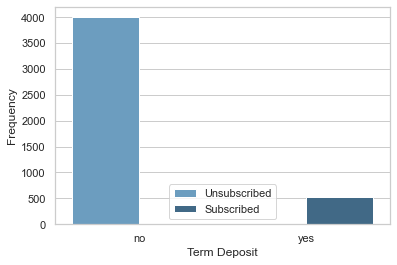

In [163]:
# Bar Graph of Term Deposit
sns.set(style='whitegrid')
ax=sns.barplot(x=df['termDeposit'].value_counts().index,y=df['termDeposit'].value_counts().values,palette="Blues_d",hue=['Unsubscribed','Subscribed'])
plt.legend(loc=8)
plt.xlabel('Term Deposit')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Age')

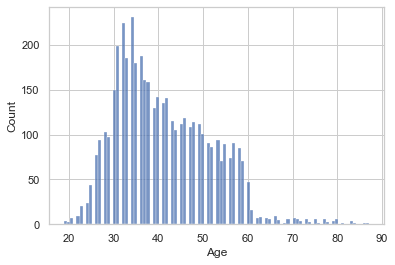

In [164]:
# Distribution of Age
ax = sns.histplot(df.age, bins=100)
plt.xlabel('Age')

Text(0.5, 0, 'Duration')

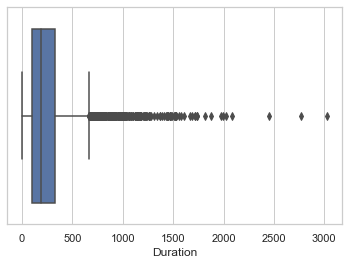

In [165]:
# Box Plot of Duration
sns.set(style='whitegrid')
sns.boxplot(x=df['duration'])
plt.xlabel('Duration')

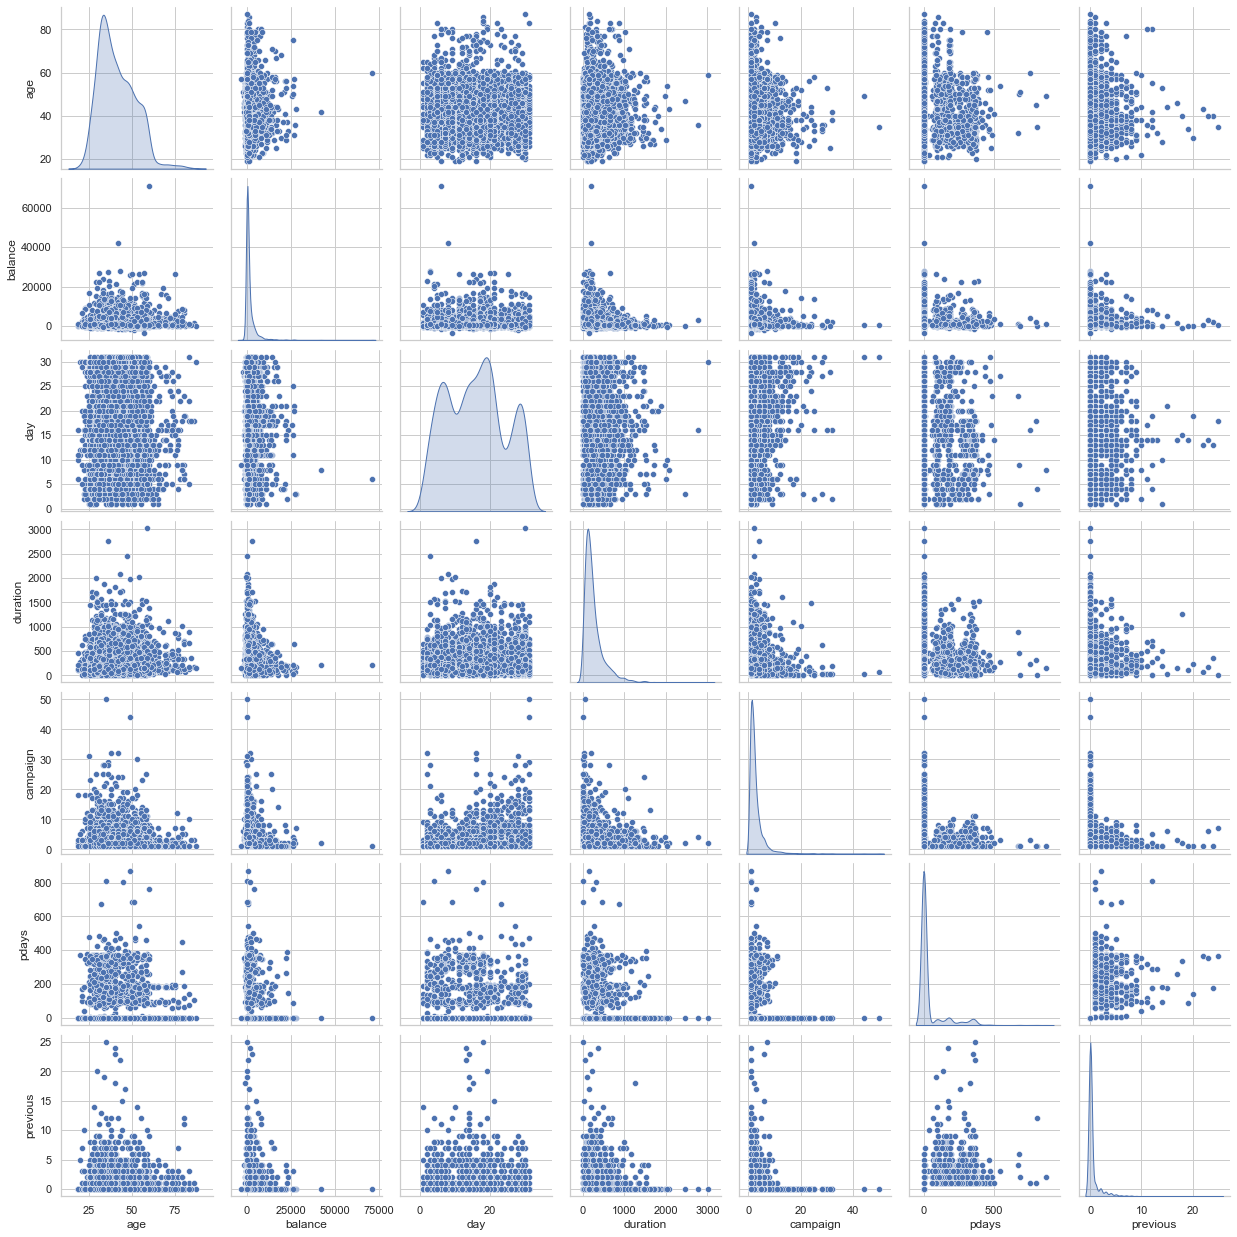

In [166]:
sns.pairplot(df, diag_kind='kde')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


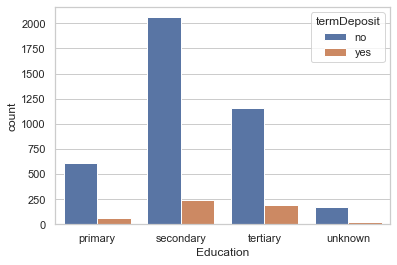

In [167]:
sns.countplot(df['education'],hue=df['termDeposit'])
plt.xlabel('Education')
plt.show()

In [168]:
# Explore Clients who made a Term deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(df[(df.termDeposit == "yes") & (df.job ==j)])))

management      :   131
blue-collar     :    69
technician      :    83
admin.          :    58
services        :    38
retired         :    54
self-employed   :    20
student         :    19
unemployed      :    13
entrepreneur    :    15
housemaid       :    14
unknown         :     7


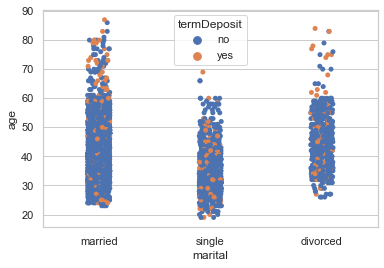

In [169]:
sns.stripplot(x='marital',y='age',hue='termDeposit',jitter=True,data=df)
plt.show()

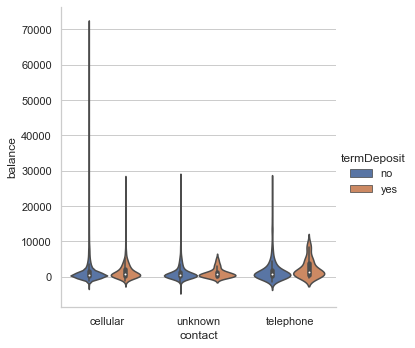

In [170]:
sns.catplot(x="contact", y="balance", hue="termDeposit", kind='violin',data=df)
plt.show()

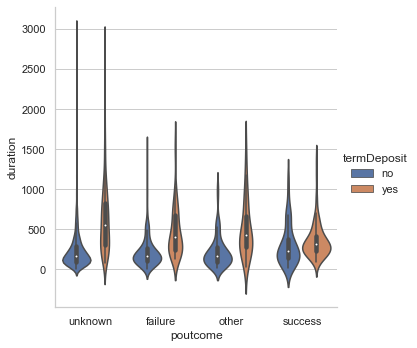

In [171]:
sns.catplot(x="poutcome", y="duration", hue="termDeposit", kind='violin',data=df)
plt.show()

Most Clients with secondary education are less likely to subscribe to a term deposit.
Clients with 'management' and 'technician' jobs are more likely to subscribe for a term deposit.
Married clients are more likely to subscribe for term deposit.
Clients with 'cellular' type of contact are less likely to subscribe for term deposit.

### 2. Data Preparation

###### 2.1 Verifying and Imputing Null Values
The count of balance is 4164 less than the other variables(null values). Create new column and then impute values  into it.

In [172]:
# Imputing missing values
def imputeNullValues(colName, df):
    # Create two new column names based on original column name.
    indicatorColName = 'm_'   + colName # Tracks whether imputed.
    imputedColName   = 'imp_' + colName # Stores original & imputed data.

    # Get mean or median depending on preference.
    imputedValue = df[colName].mean()

    # Populate new columns with data.
    imputedColumn  = []
    indictorColumn = []
    for i in range(len(df)):
        isImputed = False

        # mi_OriginalName column stores imputed & original data.
        if(np.isnan(df.loc[i][colName])):
            isImputed = True
            imputedColumn.append(imputedValue)
        else:
            imputedColumn.append(df.loc[i][colName])

        # mi_OriginalName column tracks if is imputed (1) or not (0).
        if(isImputed):
            indictorColumn.append(1)
        else:
            indictorColumn.append(0)

    # Append new columns to dataframe but always keep original column.
    df[indicatorColName] = indictorColumn
    df[imputedColName]   = imputedColumn
    del df[colName]     # Drop column with null values.
    return df

df = imputeNullValues('balance', df)
df.describe()

,age,day,duration,campaign,pdays,previous,m_balance,imp_balance
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,15.915284,263.961292,2.793630,39.766645,0.542579,0.078965,1544.629203
std,10.576211,8.247667,259.856633,3.109807,100.121124,1.693562,0.269714,2980.664325
min,19.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,-3313.000000
25%,33.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,169.000000
50%,39.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,655.000000
75%,49.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,1544.629203
max,87.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,71188.000000


###### 2.2	Convert Categorical Variables
Convert string to binary values in those columns; default, housing, loan, and termDeposit.

In [173]:
def convertToBinaryValues(df, columns):
    for i in range(0, len(columns)):
        df[columns[i]] = df[columns[i]].map({'yes': 1, 'no': 0})
    return df

data = convertToBinaryValues(df, ['default', 'housing', 'loan', 'termDeposit'])

data.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,termDeposit,m_balance,imp_balance
0,30,unemployed,married,primary,0,0,0,cellular,19,oct,79,1,-1,0,unknown,0,0,1787.000000
1,33,services,married,secondary,0,1,1,cellular,11,may,220,1,339,4,failure,0,0,4789.000000
2,35,management,single,tertiary,0,1,0,cellular,16,apr,185,1,330,1,failure,0,0,1350.000000
3,30,management,married,tertiary,0,1,1,unknown,3,jun,199,4,-1,0,unknown,0,0,1476.000000
4,59,blue-collar,married,secondary,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,1,1544.629203


###### 2.3	Dummy Variables Creation
Devide dummy values into 4 cloumns.

In [174]:
data = pd.get_dummies(df, columns=['poutcome'])
data.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,termDeposit,m_balance,imp_balance,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,0,0,0,cellular,19,oct,79,1,-1,0,0,0,1787.000000,0,0,0,1
1,33,services,married,secondary,0,1,1,cellular,11,may,220,1,339,4,0,0,4789.000000,1,0,0,0
2,35,management,single,tertiary,0,1,0,cellular,16,apr,185,1,330,1,0,0,1350.000000,1,0,0,0
3,30,management,married,tertiary,0,1,1,unknown,3,jun,199,4,-1,0,0,0,1476.000000,0,0,0,1
4,59,blue-collar,married,secondary,0,1,0,unknown,5,may,226,1,-1,0,0,1,1544.629203,0,0,0,1


###### 2.4	Binning Categories Creation
age, previous

In [175]:
#3.4 Binning Categories Creation
data['AgeBin']   = pd.cut(x=data['age'], bins=[19, 39, 59, 79, 99])
data['PreviousBin']   = pd.cut(x=data['previous'], bins=[0, 8, 16, 25])
tempDf  = data[['AgeBin', 'PreviousBin']] # Isolate columns

# Delete Original Columns    
dummyDf = pd.get_dummies(tempDf, columns=['AgeBin', 'PreviousBin'])
data      = pd.concat(([data, dummyDf]), axis=1)     # Join dummy df with original
del data['AgeBin']
del data['PreviousBin']

data.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,termDeposit,m_balance,imp_balance,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,"AgeBin_(19, 39]","AgeBin_(39, 59]","AgeBin_(59, 79]","AgeBin_(79, 99]","PreviousBin_(0, 8]","PreviousBin_(8, 16]","PreviousBin_(16, 25]"
0,30,unemployed,married,primary,0,0,0,cellular,19,oct,79,1,-1,0,0,0,1787.000000,0,0,0,1,1,0,0,0,0,0,0
1,33,services,married,secondary,0,1,1,cellular,11,may,220,1,339,4,0,0,4789.000000,1,0,0,0,1,0,0,0,1,0,0
2,35,management,single,tertiary,0,1,0,cellular,16,apr,185,1,330,1,0,0,1350.000000,1,0,0,0,1,0,0,0,1,0,0
3,30,management,married,tertiary,0,1,1,unknown,3,jun,199,4,-1,0,0,0,1476.000000,0,0,0,1,1,0,0,0,0,0,0
4,59,blue-collar,married,secondary,0,1,0,unknown,5,may,226,1,-1,0,0,1,1544.629203,0,0,0,1,0,1,0,0,0,0,0


### 3. Data Identifying Significant Features

###### 3.1 Chi-square

This chi-square test runs to loop through multiply columns against the variable value to a predictive model that indicates the relative importance of each feature when making a prediction.
The result of the test is consideration about p-value < 0.05 and Chi-square Score > 100; create a more accurate predictive model, the typical Chi-square Score >3.8 but using high Chi-square scores.

- Discard variables: job, marital, education, default, month, housing, loan, contact, day, campaign
- Predicted variables: age, balance, duration, pdays, previous, poutcome 

In [176]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None  # P-Value
        self.chi2 = None  # Chi Test Statistic
        self.dof = None

        self.dfObserved = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha, chiScore):
        result = ""
        if self.p < alpha and self.chi2 > 100:
            result = "* {0} is IMPORTANT for Prediction".format(colX)
        else:
            result = "* {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        print("  Chi-square Score: " + str(round(self.chi2, 2)))
        print("  P-value: " + str(round(self.p, 6)) + '\n')


    def TestIndependence(self, colX, colY, alpha=0.05, chiScore=100):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)

        self.dfObserved = pd.crosstab(Y, X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index=self.dfObserved.index)

        self._print_chisquare_result(colX, alpha, chiScore)


PATH = "/users/aprilki/Desktop/BCIT/13_AdvancedTopic_COMP4254/DataSets/"
FILE = "bank.csv"
df  = pd.read_csv(PATH + FILE)

# Convert to Binary Values
def convertToBinaryValues(df, columns):
    for i in range(0, len(columns)):
        df[columns[i]] = df[columns[i]].map({'yes': 1, 'no': 0})
    return df

df = convertToBinaryValues(df, ['default', 'housing', 'loan', 'termDeposit'])

# Initialize ChiSquare Class
cT = ChiSquare(df)

# Feature Selection
testColumns = ['age','job','marital','education','default','balance','housing','loan','contact','day','month',
               'duration','campaign','pdays','previous','poutcome']
for var in testColumns:
    cT.TestIndependence(colX=var, colY="termDeposit")

* age is IMPORTANT for Prediction
  Chi-square Score: 191.28
  P-value: 0.0

* job is NOT an important predictor. (Discard job from model)
  Chi-square Score: 68.99
  P-value: 0.0

* marital is NOT an important predictor. (Discard marital from model)
  Chi-square Score: 19.03
  P-value: 7.4e-05

* education is NOT an important predictor. (Discard education from model)
  Chi-square Score: 15.24
  P-value: 0.001625

* default is NOT an important predictor. (Discard default from model)
  Chi-square Score: 0.0
  P-value: 1.0

* balance is IMPORTANT for Prediction
  Chi-square Score: 2563.54
  P-value: 0.001323

* housing is NOT an important predictor. (Discard housing from model)
  Chi-square Score: 48.88
  P-value: 0.0

* loan is NOT an important predictor. (Discard loan from model)
  Chi-square Score: 21.87
  P-value: 3e-06

* contact is NOT an important predictor. (Discard contact from model)
  Chi-square Score: 87.87
  P-value: 0.0

* day is NOT an important predictor. (Discard day fro

###### 3.2 Heatmap

The heatmap indicates that the pdays and previous variables are predicted to the target as 0.58. Also, the duration variable is predicted as 0.4.

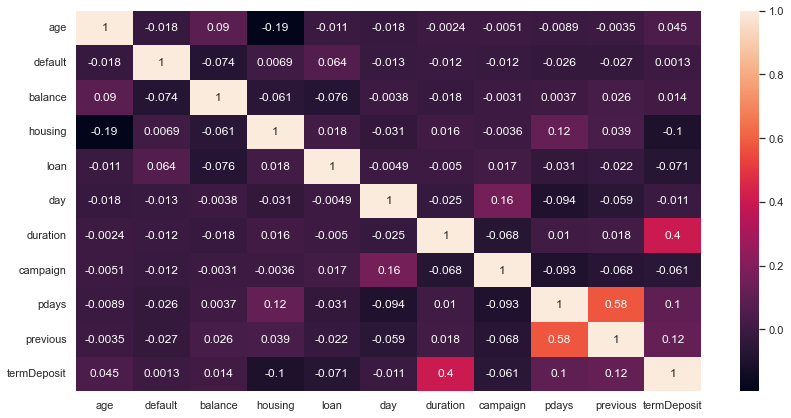

In [177]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

### 4. Data Modeling

###### 4.1 Build the Data Model

In [178]:
# Make predictions on the test set
X = data[['age','duration','pdays','previous','imp_balance', 'poutcome_failure', 'poutcome_success','poutcome_unknown']]
y = data['termDeposit']

# Scaling
sc_x    = StandardScaler()
X_Scale = sc_x.fit_transform(X)

# Train-Test split: 25% test data
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25, random_state=0)

###### 4.2 LogisticRegression

In [179]:
logisticModel = LogisticRegression(fit_intercept=True, random_state=0,
                                   multi_class='multinomial', solver='newton-cg')

# Fit the model.
logisticModel.fit(X_train, y_train)
predictions = logisticModel.predict(X_test)

# Show accuracy, precision, recall, f1 scores.
precision = round(metrics.precision_score(y_test, predictions),4)
recall    = round(metrics.recall_score(y_test, predictions), 4)
f1        = round(metrics.f1_score(y_test, predictions), 4)
accuracy  = round(metrics.accuracy_score(y_test, predictions), 4)

print("Precision: " + str(precision))
print("Recall:    " + str(recall))
print("F1:        " + str(f1))
print("Accuracy:  " + str(accuracy))

Precision: 0.7059
Recall:    0.3478
F1:        0.466
Accuracy:  0.9027


###### 4.3 DecisionTree

In [180]:
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the model.
DecisionTreeModel.fit(X_train, y_train)
predictions = DecisionTreeModel.predict(X_test)

# Show accuracy, precision, recall, f1 scores.
precision = round(metrics.precision_score(y_test, predictions),4)
recall    = round(metrics.recall_score(y_test, predictions), 4)
f1        = round(metrics.f1_score(y_test, predictions), 4)
accuracy  = round(metrics.accuracy_score(y_test, predictions), 4)

print("Precision: " + str(precision))
print("Recall:    " + str(recall))
print("F1:        " + str(f1))
print("Accuracy:  " + str(accuracy))

Precision: 0.4526
Recall:    0.4493
F1:        0.4509
Accuracy:  0.8665


###### 4.4 RandomForest

In [181]:
RandomForestModel = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'entropy')

# Fit the model.
RandomForestModel.fit(X_train, y_train)
predictions = RandomForestModel.predict(X_test)

# Show accuracy, precision, recall, f1 scores.
precision = round(metrics.precision_score(y_test, predictions),4)
recall    = round(metrics.recall_score(y_test, predictions), 4)
f1        = round(metrics.f1_score(y_test, predictions), 4)
accuracy  = round(metrics.accuracy_score(y_test, predictions), 4)

print("Precision: " + str(precision))
print("Recall:    " + str(recall))
print("F1:        " + str(f1))
print("Accuracy:  " + str(accuracy))

Precision: 0.6463
Recall:    0.3841
F1:        0.4818
Accuracy:  0.8992


###### 4.5 KNeighbors

In [182]:
KNeighborsModel = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)

# Fit the model.
KNeighborsModel.fit(X_train, y_train)
predictions = KNeighborsModel.predict(X_test)

# Show accuracy, precision, recall, f1 scores.
precision = round(metrics.precision_score(y_test, predictions),4)
recall    = round(metrics.recall_score(y_test, predictions), 4)
f1        = round(metrics.f1_score(y_test, predictions), 4)
accuracy  = round(metrics.accuracy_score(y_test, predictions), 4)

print("Precision: " + str(precision))
print("Recall:    " + str(recall))
print("F1:        " + str(f1))
print("Accuracy:  " + str(accuracy))

Precision: 0.6567
Recall:    0.3188
F1:        0.4293
Accuracy:  0.8966


###### 4.6 GaussianNB

In [183]:
GaussianNBModel = GaussianNB()

# Fit the model.
GaussianNBModel.fit(X_train, y_train)
predictions = GaussianNBModel.predict(X_test)

# Show accuracy, precision, recall, f1 scores.
precision = round(metrics.precision_score(y_test, predictions),4)
recall    = round(metrics.recall_score(y_test, predictions), 4)
f1        = round(metrics.f1_score(y_test, predictions), 4)
accuracy  = round(metrics.accuracy_score(y_test, predictions), 4)

print("Precision: " + str(precision))
print("Recall:    " + str(recall))
print("F1:        " + str(f1))
print("Accuracy:  " + str(accuracy))

Precision: 0.4241
Recall:    0.4855
F1:        0.4527
Accuracy:  0.8568


###### 4.7 AdaBoost

In [184]:
AdaBoostModel = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R',
                              random_state=None)

# Fit the model.
AdaBoostModel.fit(X_train, y_train)
predictions = AdaBoostModel.predict(X_test)

# Show accuracy, precision, recall, f1 scores.
precision = round(metrics.precision_score(y_test, predictions),4)
recall    = round(metrics.recall_score(y_test, predictions), 4)
f1        = round(metrics.f1_score(y_test, predictions), 4)
accuracy  = round(metrics.accuracy_score(y_test, predictions), 4)

print("Precision: " + str(precision))
print("Recall:    " + str(recall))
print("F1:        " + str(f1))
print("Accuracy:  " + str(accuracy))

Precision: 0.6164
Recall:    0.3261
F1:        0.4265
Accuracy:  0.893


###### 4.8 ROC Curves

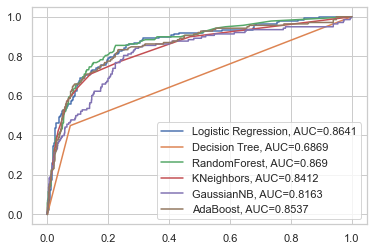

In [185]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = logisticModel
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
model = DecisionTreeModel
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit RandomForest model and plot ROC curve
model = RandomForestModel
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RandomForest, AUC="+str(auc))

#fit KNeighbors model and plot ROC curve
model = KNeighborsModel
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNeighbors, AUC="+str(auc))

#fit GaussianNB model and plot ROC curve
model = GaussianNBModel
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="GaussianNB, AUC="+str(auc))

#fit AdaBoost model and plot ROC curve
model = AdaBoostModel
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))

#add legend
plt.legend()

For the determination of a model, 6 different models work: Logistic regression, decision tree, Random Forest, KNeighbors, GaussianNB and Adaboost.
The best model is that Logistic Regression has shown 90 percent(0.9027) of accuracy.
Indeed, the closer a ROC curve is to the upper left corner and the AUC is the highest score as 86 percent(0.8641), the more efficient is the Logistic Regression test.

### 5. Model Evaluation

###### 5.1 Stacked Modeling

The logistic Regression, Random Forest, Kneighbors and AdaBoost of the accuracy are slightly higher than the DicisionTree, 86 percent and GaussianNB, 89 percent as 90 percent. Furthermore, you can clearly see that stacking produced an improvement in performance, with the stacked model outperforming all the base models and achieving an accuracy of close to 91 percent. Therefore, the stacked model indicates the best model to prediction to the target variable.

In [186]:
def getUnfitModels():
    models = list()
    models.append(LogisticRegression(solver='liblinear'))
    models.append(DecisionTreeClassifier())
    models.append(RandomForestClassifier(n_estimators=10))
    models.append(KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2))
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    return models

def evaluateModel(y_test, predictions, model):
    precision = round(metrics.precision_score(y_test, predictions),2)
    recall    = round(metrics.recall_score(y_test, predictions), 2)
    f1        = round(metrics.f1_score(y_test, predictions), 2)
    accuracy  = round(metrics.accuracy_score(y_test, predictions), 2)

    print("Precision:" + str(precision) + "   Recall:" + str(recall) +\
          "   F1:" + str(f1) + "   Accuracy:" + str(accuracy) +\
          "   " + model.__class__.__name__)

def fitBaseModels(X_train, y_train, X_test, models):
    dfPredictions = pd.DataFrame()

    # Fit base model and store its predictions in dataframe.
    for i in range(0, len(models)):
        models[i].fit(X_train, y_train)
        predictions = models[i].predict(X_test)
        colName = str(i)
        dfPredictions[colName] = predictions
    return dfPredictions, models

def fitStackedModel(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    return model

# Get base models.
unfitModels = getUnfitModels()

# Fit base and stacked models.
dfPredictions, models = fitBaseModels(X_train, y_train, X_test, unfitModels)
stackedModel          = fitStackedModel(dfPredictions, y_test)

# Evaluate base models with validation data.
print("\n** Evaluate Base Models **")
dfValidationPredictions = pd.DataFrame()
for i in range(0, len(models)):
    predictions = models[i].predict(X_val)
    colName = str(i)
    dfValidationPredictions[colName] = predictions
    evaluateModel(y_val, predictions, models[i])

# Evaluate stacked model with validation data.
stackedPredictions = stackedModel.predict(dfValidationPredictions)
print("\n** Evaluate Stacked Model **")
evaluateModel(y_val, stackedPredictions, stackedModel)


** Evaluate Base Models **
Precision:0.12   Recall:0.99   F1:0.21   Accuracy:0.16   LogisticRegression
Precision:0.0   Recall:0.0   F1:0.0   Accuracy:0.89   DecisionTreeClassifier
Precision:0.12   Recall:0.94   F1:0.21   Accuracy:0.18   RandomForestClassifier
Precision:0.14   Recall:0.27   F1:0.19   Accuracy:0.73   KNeighborsClassifier
Precision:0.16   Recall:0.35   F1:0.22   Accuracy:0.71   GaussianNB
Precision:0.09   Recall:0.01   F1:0.02   Accuracy:0.88   AdaBoostClassifier

** Evaluate Stacked Model **
Precision:0.08   Recall:0.01   F1:0.02   Accuracy:0.87   LogisticRegression


###### 5.2 Cross Fold Validation

This Cross Fold Validation is based on 10 folds and indicates to achieve good outperforming of the accuracy between a minimum of 87 percent and a maximum of 91 percent. The average value of accuracy is 89%, which is 2% lower than the 91% shown by the stack model.

In [187]:
count = 0

# Normalize estimated balance
sc_x = StandardScaler()

# Fit and transform the data.
dfX = X
dfXScaled = sc_x.fit_transform(dfX)
y = data['termDeposit']

# prepare cross validation with ten folds.
kfold = KFold(n_splits=10, shuffle=True)
accuracyList = []
precisionList = []
recallList = []
f1List = []

for train_index, test_index in kfold.split(dfXScaled):
    X_train, X_test = dfXScaled[train_index], dfXScaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform logistic regression.
    logisticModel = LogisticRegression(fit_intercept=True,
                                       solver='liblinear')
    # Fit the model.
    logisticModel.fit(X_train, np.ravel(y_train))

    y_pred = logisticModel.predict(X_test)
    y_prob = logisticModel.predict_proba(X_test)

    # Show confusion matrix and accuracy scores.
    cm = pd.crosstab(y_test, y_pred,
                     rownames=['Actual'],
                     colnames=['Predicted'])
    count += 1
    print("\n*** K-fold: " + str(count) + " ***")

    # Calculate accuracy and precision scores and add to the list.

    precision = round(metrics.precision_score(y_test, y_pred),4)
    recall    = round(metrics.recall_score(y_test, y_pred), 4)
    f1        = round(metrics.f1_score(y_test, y_pred), 4)
    accuracy  = round(metrics.accuracy_score(y_test, y_pred), 4)


    accuracyList.append(accuracy)
    precisionList.append(precision)
    recallList.append(recall)
    f1List.append(f1)

    print("Accuracy: ", accuracy)
    print("Precision:", precision)
    print("Recall:   ", recall)
    print("F1:       ", f1)
    print("\nConfusion Matrix")
    print(cm)

# Show averages of scores over multiple runs.
print("\n\nAverage and Standard Deviation For All Folds:")
print("**********************************************")
print("Accuracy  - Average: " + str(round(np.mean(accuracyList), 4)) + "     Std:"  + str(round(np.std(accuracyList), 4)))
print("Precision - Average: " + str(round(np.mean(precisionList), 4)) + "     Std:"  + str(round(np.std(precisionList),4 )))
print("Recall    - Average: " + str(round(np.mean(recallList), 4)) + "     Std:"  + str(round(np.std(recallList),4 )))
print("F1        - Average: " + str(round(np.mean(f1List), 4)) + "     Std:"  + str(round(np.std(f1List),4 )))


*** K-fold: 1 ***
Accuracy:  0.8874
Precision: 0.6364
Recall:    0.35
F1:        0.4516

Confusion Matrix
Predicted    0   1
Actual            
0          381  12
1           39  21

*** K-fold: 2 ***
Accuracy:  0.8717
Precision: 0.4545
Recall:    0.1786
F1:        0.2564

Confusion Matrix
Predicted    0   1
Actual            
0          384  12
1           46  10

*** K-fold: 3 ***
Accuracy:  0.9115
Precision: 0.7333
Recall:    0.234
F1:        0.3548

Confusion Matrix
Predicted    0   1
Actual            
0          401   4
1           36  11

*** K-fold: 4 ***
Accuracy:  0.9049
Precision: 0.5652
Recall:    0.2826
F1:        0.3768

Confusion Matrix
Predicted    0   1
Actual            
0          396  10
1           33  13

*** K-fold: 5 ***
Accuracy:  0.9071
Precision: 0.4762
Recall:    0.2439
F1:        0.3226

Confusion Matrix
Predicted    0   1
Actual            
0          400  11
1           31  10

*** K-fold: 6 ***
Accuracy:  0.8982
Precision: 0.6538
Recall:    0.3148
F1:  

### 6. Conclusion

When observing different base models, the accuracy indicates between 87 percent and 90 percent as good performing. However, the stacked model is shown best performing 91 percent accuracy. 
Aside from this, the stack model can be ensembled to perform better prediction accuracy using different base learner models than the model I used the following algorithms: GBM base learner, SVC, Gradient Boosting, XGB Regressor and so on.